In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [11]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [12]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
def plot_sample(X,y,index):
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

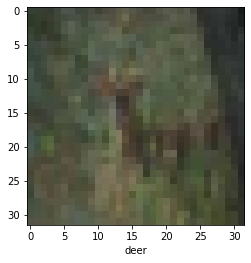

In [14]:
plot_sample(X_train,y_train,10)

In [16]:
X_train = X_train/255
X_test = X_test/255

In [19]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [20]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 30s 8ms/step - loss: 1.4587 - accuracy: 0.4767
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0943 - accuracy: 0.6157
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9757 - accuracy: 0.6576
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8899 - accuracy: 0.6919
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8233 - accuracy: 0.7146
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7692 - accuracy: 0.7339
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7222 - accuracy: 0.7476
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6786 - accuracy: 0.7641
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6396 - accuracy: 0.7756
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.60

In [21]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.9538 - accuracy: 0.6994


[0.9537647366523743, 0.699400007724762]

In [23]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[1.90773106e-04, 1.18308533e-04, 1.79519222e-04, 7.80390859e-01,
        3.15482939e-05, 2.05167845e-01, 2.22239108e-03, 3.97843860e-06,
        2.29134038e-03, 9.40344017e-03],
       [1.66138392e-02, 4.65706944e-01, 4.38964889e-06, 1.94025097e-06,
        6.53241727e-08, 1.54058561e-08, 3.78450915e-09, 3.38615607e-08,
        5.04551053e-01, 1.31216990e-02],
       [2.73659110e-01, 3.64959873e-02, 1.14426448e-03, 9.74207942e-04,
        7.07450788e-04, 7.52415217e-04, 2.41796923e-04, 1.11524144e-03,
        5.62167943e-01, 1.22741565e-01],
       [7.50998199e-01, 2.03123596e-02, 1.20791153e-03, 4.96604387e-03,
        1.74647532e-02, 7.09379456e-05, 6.51056063e-04, 1.26400701e-05,
        2.03749880e-01, 5.66178875e-04],
       [3.73298963e-06, 1.73565059e-06, 1.72193022e-03, 7.65589206e-03,
        8.98367226e-01, 2.76661915e-04, 9.19592008e-02, 8.55924895e-07,
        1.23131995e-05, 3.85188940e-07]], dtype=float32)

In [25]:
y_classes = [np.argmax(ele) for ele in y_pred]

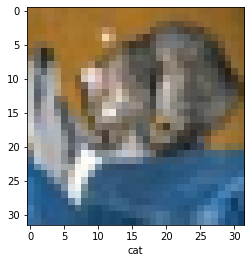

In [28]:
plot_sample(X_test,y_test,0)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      1000
           1       0.85      0.76      0.80      1000
           2       0.64      0.58      0.60      1000
           3       0.57      0.41      0.48      1000
           4       0.68      0.65      0.66      1000
           5       0.53      0.72      0.61      1000
           6       0.84      0.69      0.76      1000
           7       0.75      0.73      0.74      1000
           8       0.77      0.85      0.80      1000
           9       0.70      0.84      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

